In [141]:
from music21 import *
import json
import os

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

from IPython.display import display
import numpy as np


In [2]:
 # Load the JSON data
with open('arab_andalusian_music/arab-andalusian-scores-lines.json', 'r') as json_file:
    annotations = json.load(json_file)

In [3]:
FOLDER_PATH = 'arab_andalusian_music/scores'
SCORES_FOLDER = os.listdir(FOLDER_PATH)

scores = {}

for i in range(len(SCORES_FOLDER)):
    file_name = SCORES_FOLDER[i]
    mbid = file_name.split('.xml')[0]
    file_path = os.path.join(FOLDER_PATH, file_name)  
    
    try:
        for annotation in annotations:
            if annotation['mbid'] == mbid:
                score = converter.parse(file_path)
                scores[mbid] = {'score': score, 'annotations': annotation['sections']}

    except Exception as e:
        print(f"Error parsing file '{file_path}': {e}")

In [4]:
def parse_score_info(score_info):
    return score_info['score'], score_info['annotations']

In [5]:
scores

{'a451a7fc-c53f-462a-b3fc-4377bb588105': {'score': <music21.stream.Score 0x10aac8ed0>,
  'annotations': [{'name': 'mišālia',
    'ṭab‘': 'al-māya',
    'mīzān': 'none',
    'start': 0.0,
    'end': 208.0},
   {'name': 'muassa‘',
    'ṭab‘': 'al-māya',
    'mīzān': 'bṭāyḥī',
    'start': 214.0,
    'ṣanā`i`': [{'name': 'muassa‘.1',
      'form': 'zejel',
      'start': 214.0,
      'lines': [{'name': 'muassa‘.1.1',
        'start': 214.0,
        'sections': [{'name': 'muassa‘.1.1.1', 'start': 214.0, 'end': 235.5},
         {'name': 'muassa‘.1.1.1', 'start': 262.0, 'end': 283.5},
         {'name': 'muassa‘.1.1.2', 'start': 286.0, 'end': 307.5},
         {'name': 'muassa‘.1.1.2', 'start': 310.0, 'end': 333.5}],
        'end': 333.5},
       {'name': 'muassa‘.1.2',
        'start': 334.0,
        'sections': [{'name': 'muassa‘.1.2.1', 'start': 334.0, 'end': 349.5},
         {'name': 'muassa‘.1.2.2', 'start': 350.0, 'end': 363.5}],
        'end': 363.5},
       {'name': 'muassa‘.1.3',
    

In [6]:
def extract_measures(score, start_offset, end_offset):
    '''
    

    PARAMETERS: score:
                start_offset:
                end_offset:
    
    RETURNS:    extracted part: 
    '''
    extracted_part = stream.Stream()

    for element in score.getElementsByOffset(start_offset, end_offset, includeEndBoundary=False):
        extracted_part.append(element)

    return extracted_part


def extract_sections(score, score_sections):
    '''
    

    PARAMETERS: score:
                score_sections:
    
    RETURNS:    score_sections: 
    '''

    for section in score_sections:
        start_measure = section['start']
        end_measure = section['end']

        extracted_measures = extract_measures(score, start_measure, end_measure)
        section['score'] = extracted_measures

        if 'ṣanā`i`' in section:
            sanai = section['ṣanā`i`']
            num_sanai = len(sanai)

            for i in range(num_sanai):
                sana = sanai[i]
                sana_start = sana['start']
                sana_end = sana['end']
                sana_measures = extract_measures(score, sana_start, sana_end)
                section['ṣanā`i`'][i]['score'] = sana_measures

                if 'lines' in sana:
                    lines = sana['lines']
                    num_lines = len(lines)

                    for j in range(num_lines):
                        line = lines[j]
                        line_start = line['start']
                        line_end = line['end']
                        line_measures = extract_measures(score, line_start, line_end)
                        section['ṣanā`i`'][i]['lines'][j]['score'] = line_measures

                        if 'sections' in line:
                            line_sections = line['sections']
                            num_line_sections = len(line_sections)

                            for k in range(num_line_sections):
                                line_section = line_sections[k]
                                line_section_start = line_section['start']
                                line_section_end = line_section['end']
                                line_section_measures = extract_measures(score, line_section_start, line_section_end)
                                section['ṣanā`i`'][i]['lines'][j]['sections'][k]['score'] = line_section_measures

    return score_sections

In [7]:
'''
Iterate through all mbids within the scores and extract the sections within them to 
add the corresponding music streams into the data structure.
'''

i = 0

for mbid in scores:
    score, annotations = parse_score_info(scores[mbid])

    flattened_score = score.parts[0].flatten().notesAndRests.stream()
    score_sections = extract_sections(flattened_score, annotations)

    scores[mbid]['annotations'] = score_sections
    
    i+=1

In [8]:
# sanity check how many scores are counted within the JSON
i

5

In [9]:
# sanity check that score parsing worked
scores['a451a7fc-c53f-462a-b3fc-4377bb588105']['annotations'][1]['ṣanā`i`'][0]['lines'][0]['sections'][0]['score'].show()

SubConverterException: Cannot find a path to the 'mscore' file at /Applications/MuseScore 3.app/Contents/MacOS/mscore -- download MuseScore

In [10]:
scores

{'a451a7fc-c53f-462a-b3fc-4377bb588105': {'score': <music21.stream.Score 0x10aac8ed0>,
  'annotations': [{'name': 'mišālia',
    'ṭab‘': 'al-māya',
    'mīzān': 'none',
    'start': 0.0,
    'end': 208.0,
    'score': <music21.stream.Stream 0x11e40e510>},
   {'name': 'muassa‘',
    'ṭab‘': 'al-māya',
    'mīzān': 'bṭāyḥī',
    'start': 214.0,
    'ṣanā`i`': [{'name': 'muassa‘.1',
      'form': 'zejel',
      'start': 214.0,
      'lines': [{'name': 'muassa‘.1.1',
        'start': 214.0,
        'sections': [{'name': 'muassa‘.1.1.1',
          'start': 214.0,
          'end': 235.5,
          'score': <music21.stream.Stream 0x11cad96d0>},
         {'name': 'muassa‘.1.1.1',
          'start': 262.0,
          'end': 283.5,
          'score': <music21.stream.Stream 0x119f82a10>},
         {'name': 'muassa‘.1.1.2',
          'start': 286.0,
          'end': 307.5,
          'score': <music21.stream.Stream 0x119a5d090>},
         {'name': 'muassa‘.1.1.2',
          'start': 310.0,
         

You can now see that the equivalent music streams have been added to each sanai and its sections.

In [11]:
# extract full sanai information and sanai scores
all_sanai = []
all_sanai_scores = []
all_sanai_lines_scores = []
for mbid in scores:
    score_info = scores[mbid]
    annotations = score_info['annotations']

    for section in annotations:
        if 'ṣanā`i`' in section:
            sanai = section['ṣanā`i`']
            all_sanai.extend(sanai)

            sana_count = 0
            for sana in sanai:
                all_sanai_scores.append(sana['score'])

                lines = sana['lines']
                all_lines_scores = []
                for line in lines:
                    all_lines_scores.append(line['score'])

                all_sanai_lines_scores.append(all_lines_scores)
                

In [12]:
'''
Testing that the parsing of the created data strcuture works by counting the occurrence of sanai, sana, lines and sections.
'''

score_section_counts = {}
sanai_count = 0
for mbid in scores:
    _, annotations = parse_score_info(scores[mbid])
    counts = {}

    for section in annotations:
        if 'ṣanā`i`' in section:
            sanai_count += 1

            this_sanai = 'sanai_' + str(sanai_count)
            if this_sanai not in counts:
                counts[this_sanai] = {}

            sana_count = 0
            for sana in section['ṣanā`i`']:
                sana_count += 1

                this_sana = 'sana_' + str(sana_count)
                if this_sana not in counts[this_sanai]:
                    counts[this_sanai][this_sana] = {}
                
                line_count = 0
                for line in sana['lines']:
                    line_count += 1

                    this_line = 'line_' + str(line_count)
                    if this_line not in counts[this_sanai][this_sana]:
                        counts[this_sanai][this_sana][this_line] = {}

                    line_section_count = 0
                    for line_section in line['sections']:
                        line_section_count += 1

                    counts[this_sanai][this_sana][this_line]['section_count'] = line_section_count

                counts[this_sanai][this_sana]['line_count'] = line_count
            
            counts[this_sanai]['sana_count'] = sana_count

        counts['sanai_count'] = sanai_count
    
    score_section_counts[mbid] = counts

In [13]:
score_section_counts

{'a451a7fc-c53f-462a-b3fc-4377bb588105': {'sanai_count': 3,
  'sanai_1': {'sana_1': {'line_1': {'section_count': 4},
    'line_2': {'section_count': 2},
    'line_3': {'section_count': 2},
    'line_4': {'section_count': 2},
    'line_5': {'section_count': 4},
    'line_count': 5},
   'sana_2': {'line_1': {'section_count': 2},
    'line_2': {'section_count': 2},
    'line_count': 2},
   'sana_3': {'line_1': {'section_count': 2},
    'line_2': {'section_count': 2},
    'line_3': {'section_count': 2},
    'line_4': {'section_count': 2},
    'line_5': {'section_count': 2},
    'line_count': 5},
   'sana_4': {'line_1': {'section_count': 2},
    'line_2': {'section_count': 2},
    'line_3': {'section_count': 2},
    'line_4': {'section_count': 2},
    'line_5': {'section_count': 2},
    'line_count': 5},
   'sana_count': 4},
  'sanai_2': {'sana_1': {'line_1': {'section_count': 2},
    'line_2': {'section_count': 2},
    'line_3': {'section_count': 2},
    'line_4': {'section_count': 2},
   

In [14]:
amin_cachoo_centos = [['A', 'G', 'F', 'E'], ['B-', 'A', 'G'], ['B', 'D', 'C'], ['C', 'B', 'A', 'G'], ['E', 'F', 'G'], ['F', 'G', 'E', 'F', 'E', 'D', 'C'], ['G', 'A', 'B', 'C']]
tf_idf_centos = [['G', 'F', 'E'], ['E', 'F', 'G'], ['A', 'G', 'F'], ['F', 'E', 'D'], ['E', 'D', 'C'], ['F', 'E', 'D', 'C'], ['A', 'G', 'F', 'E']]
sia_centos = [['A', 'G', 'F'], ['D', 'C', 'B'], ['E', 'D', 'C'], ['E', 'E', 'F'], ['E', 'F', 'E'], ['E', 'F', 'G'], ['F', 'E', 'D'], ['F', 'E', 'F']]
mgdp_centos = [['G', 'E', 'F'], ['F', 'G', 'E'], ['B-', 'A', 'G']]

In [15]:
def count_pattern_in_score(score, pattern):
    '''
    Count single pattern in single score.

    PARAMETERS: 
        - score ():
        - pattern (array): 
    
    RETURNS:    
        first_quarter_count (int): number of occurences of a pattern in the beginning 25% of a given section
        middle_count (int): number of occurences of a pattern in the middle 50% of a given section
        last_quarter_count (int): number of occurences of a pattern in the last 25% of a given section
    '''
    score_pitch_names = [n.name for n in score.getElementsByClass(note.Note)]
    score_length = len(score_pitch_names)

    # Count occurrences of the pattern in the score
    pattern_count = 0
    first_quarter_count = 0
    last_quarter_count = 0
    for i in range(len(score_pitch_names) - len(pattern) + 1):
        if score_pitch_names[i:i+len(pattern)] == pattern:
            pattern_count += 1
            if i < int(score_length * 0.25):
                first_quarter_count += 1
            elif i >= (score_length - int(score_length * 0.25)):
                last_quarter_count += 1

    # Count how prealent a pattern is in the middle 50% of the score section 
    middle_count = pattern_count - (first_quarter_count + last_quarter_count)

    return first_quarter_count, middle_count, last_quarter_count


def count_all_patterns(score, patterns):
    '''
    Iterate through all the different patterns (centos) of a score to count their prevalence.

    PARAMETERS: 
        - score:
        - patterns (list): list containing all centos/patterns as lists of notes
    
    RETURNS:    
        pattern_counts (dict): dictionary containing the counts of each pattern
    '''
    pattern_counts = {}

    for pattern in patterns:
        pattern_str = ''.join(pattern)
        pattern_count = count_pattern_in_score(score, pattern)

        pattern_counts[pattern_str] = pattern_count

    return pattern_counts

In [16]:
def count_all_patterns_wrapper(scores, patterns):
    '''
    Count all centos in a pattern array from the score sections.

    PARAMETERS: 
        - score:
        - patterns:
    
    RETURNS:   
        all_centos_counts (dict): dictionary containing the centos counts

    '''
    all_centos_counts = {}

    for mbid in scores:
        _, annotations = parse_score_info(scores[mbid])
        all_centos_counts[mbid] = {'sanai': {}, 'lines': {}}

        section_count = 0
        for section in annotations:
            section_count += 1

            if 'ṣanā`i`' in section:
                
                sana_count = 0
                for sana in section['ṣanā`i`']:
                    sana_count += 1
                    sana_score = sana['score']

                    which_sana = 'section_' + str(section_count) + '_sana_' + str(sana_count)
                    sana_pattern_counts = count_all_patterns(sana_score, patterns)
                    all_centos_counts[mbid]['sanai'][which_sana] = sana_pattern_counts

                    line_count = 0
                    for line in sana['lines']:
                        line_count += 1
                        line_score = line['score']

                        which_line = which_sana + '_line_' + str(line_count)
                        line_pattern_counts = count_all_patterns(line_score, patterns)
                        all_centos_counts[mbid]['lines'][which_line] = line_pattern_counts

    return all_centos_counts

In [21]:
# NOTE FROM SUVI: how would we feel aobut changing the name of scores in this context to e.g. data_set? As the full dict with all the scores is our 'data set' for the project
# also might make it a bit clearer like datat set vs the scores in the context of the other functions 

'''
Extracting the centos counts of the different key centos of ṭab‘ al-māya identified by Nuttall et. als paper
'''

all_amin_chachoo_centos_counts = count_all_patterns_wrapper(scores, amin_cachoo_centos)
all_tf_idf_centos_counts = count_all_patterns_wrapper(scores, tf_idf_centos)
all_sia_centos_counts = count_all_patterns_wrapper(scores, sia_centos)
all_mgdp_centos_counts = count_all_patterns_wrapper(scores, mgdp_centos)

In [18]:
all_sia_centos_counts

{'a451a7fc-c53f-462a-b3fc-4377bb588105': {'sanai': {'section_2_sana_1': {'AGF': (4,
     10,
     2),
    'DCB': (4, 6, 5),
    'EDC': (6, 11, 7),
    'EEF': (6, 14, 5),
    'EFE': (8, 6, 7),
    'EFG': (11, 12, 10),
    'FED': (7, 12, 8),
    'FEF': (7, 6, 5)},
   'section_2_sana_2': {'AGF': (9, 12, 5),
    'DCB': (1, 6, 4),
    'EDC': (2, 6, 4),
    'EEF': (8, 15, 6),
    'EFE': (3, 6, 4),
    'EFG': (4, 9, 4),
    'FED': (3, 6, 4),
    'FEF': (2, 3, 2)},
   'section_2_sana_3': {'AGF': (5, 4, 1),
    'DCB': (6, 13, 6),
    'EDC': (4, 7, 2),
    'EEF': (6, 3, 3),
    'EFE': (4, 7, 2),
    'EFG': (7, 13, 8),
    'FED': (5, 10, 5),
    'FEF': (1, 0, 0)},
   'section_2_sana_4': {'AGF': (6, 13, 6),
    'DCB': (7, 10, 5),
    'EDC': (8, 21, 11),
    'EEF': (7, 21, 12),
    'EFE': (12, 35, 19),
    'EFG': (9, 17, 9),
    'FED': (8, 17, 9),
    'FEF': (4, 15, 7)},
   'section_3_sana_1': {'AGF': (9, 18, 7),
    'DCB': (0, 0, 0),
    'EDC': (4, 8, 4),
    'EEF': (0, 2, 1),
    'EFE': (6, 11, 6

In [19]:
first_sana = all_sanai_scores[0]
example_cento = amin_cachoo_centos[0]
first_quarter_count, middle_count, last_quarter_count = count_pattern_in_score(first_sana, example_cento)

In [20]:
first_quarter_count, middle_count, last_quarter_count

(4, 9, 2)

In [25]:
PLOTS_PATH = 'plots'

In [61]:
def save_plot(plot, plot_title, plots_folder=PLOTS_PATH):
    '''
    Save a plot to a speficied folder with a specified name.

    PARAMETERS: 
        - plot_title (str): plot_title for plot file.
        - plots_folder (str): Folder to save plot file in.
    '''

    file_name = plot_title.replace(' ', '_')

    file_path = os.path.join(plots_folder, file_name)
    plot.savefig(file_path)

def count_centos_positions(centos_counts_dict):
    '''
    Function used to count the start, middle, and end positions of extracted centos counts for a given set of key centos of ṭab al-māya.

    PARAMETERS: 
        - centos_counts_dict (dict): dict containing the counts for different cetos values

    RETURNS: 
        DataFrame containing counts for start, middle, and end positions of centos.
    '''
    pattern_counts = {'Pattern': [], 'Start': [], 'Middle': [], 'End': []}
    for section, patterns in centos_counts_dict.items():
        for pattern, counts in patterns.items():
            pattern_counts['Pattern'].append(pattern)
            pattern_counts['Start'].append(counts[0])
            pattern_counts['Middle'].append(counts[1])
            pattern_counts['End'].append(counts[2])

    df = pd.DataFrame(pattern_counts)

    # Group by 'Pattern' and sum the counts
    df = df.groupby('Pattern').sum().reset_index()

    # Calculate cumulative counts for each position in the tuple
    df['Start 25%'] = df['Start']
    df['Middle 50%'] = df['Middle']
    df['End 25%'] = df['End']

    # Drop unnecessary columns
    df.drop(['Start', 'Middle', 'End'], axis=1, inplace=True)

    return df

def plot_centos_distribution(cumulative_df, plot_title):
    '''
    Function used to plot the distribution of extracted centos counts for a given set of key centos of ṭab al-māya.

    PARAMETERS: 
        - cumulative_df (DataFrame): DataFrame containing cumulative counts for start, middle, and end positions of centos.
        - plot_title (str): name for the plot

    OUTPUT: 
        Displays the cumulative graph of centos placement.

    RETURNS:
        nothing
    '''

    # Melt the DataFrame to prepare for graphing
    melted_cumulative_df = pd.melt(cumulative_df, id_vars='Pattern', var_name='Position', value_name='Cumulative Count')

    # Plot cumulative counts
    plt.figure(figsize=(10, 6))
    sns.barplot(data=melted_cumulative_df, x='Pattern', y='Cumulative Count', hue='Position', palette='pastel')
    plt.title('Cumulative Counts of Positions of Centos: ' + plot_title)
    plt.xlabel('Pattern')
    plt.ylabel('Cumulative Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.show()

In [67]:
'''
Count the cumulative distribution of centos for different sanai.
'''

# Get the mizans for each file in the dataset (for naming plots)
scores_mizan_dict = {}
for mbid, data in scores.items():
    annotations = data.get('annotations', [])
    mizans = set(annotation['mīzān'] for annotation in annotations)
    scores_mizan_dict[mbid] = mizans


centos_counts = [all_amin_chachoo_centos_counts, all_tf_idf_centos_counts, all_sia_centos_counts, all_mgdp_centos_counts]
centos_counts_str = ['Amin Chachoo centos ', 'TF IDF centos ', 'SIA centos ', 'MGPD centos ']

i=0
cumulative_sanai_centos_positions = {}
cumulative_line_centos_positions = {}

for centos_list in centos_counts:
    for mbid, count_data in centos_list.items():
        # construct title of tab for graphs
        mizan_values = [mizan for mizan in scores_mizan_dict[mbid] if mizan != 'none']
        tab_mizan_name = 'ṭab‘ al-māya ' + ''.join(str(mizan) for mizan in mizan_values)

        # cumulative counts and graphs (optional) for sanai level
        sanai_centos_counts_dict = count_data.get('sanai', {})
        plot_title = centos_counts_str[i] + ': sanai of ' + tab_mizan_name 
        sanai_centos_position_counts_df = count_centos_positions(sanai_centos_counts_dict)
        cumulative_sanai_centos_positions[plot_title] = sanai_centos_position_counts_df
        #plot_centos_distribution(sanai_centos_position_counts_df, plot_title)

        # cumulative counts and graphs (optional) for line level
        line_centos_counts_dict = count_data.get('lines', {})
        plot_title = centos_counts_str[i] + ': lines of ' + tab_mizan_name 
        line_centos_position_counts_df = count_centos_positions(line_centos_counts_dict)
        cumulative_line_centos_positions[plot_title] = line_centos_position_counts_df
        # plot_centos_distribution(line_centos_position_counts_df, plot_title)

    i+=1
    
#print(cumulative_sanai_centos_positions)

In [70]:
def count_distribution_over_dataset(cumulative_centos_positions):
    '''
    Merge the count distribution data over the dataset.

    This function takes a dictionary of DataFrames containing count distribution data for different centos types 
    and merges the data for the same centos count type. It then aggregates the numerical values for each letter pattern.

    PARAMETERS:
    - cumulative_centos_positions (dict): A dictionary where keys represent centos count types and values are DataFrames
                                          containing count distribution data.

    RETRUNS:
    dict: A dictionary where keys are centos count types and values are DataFrames containing merged and aggregated
          count distribution data for each letter pattern.
    '''
    merged_data = {}
    for key, df in cumulative_centos_positions.items():
        prefix = key.split(':')[0].strip()
        if prefix not in merged_data:
            merged_data[prefix] = df
        else:
            merged_data[prefix] = pd.concat([merged_data[prefix], df], ignore_index=True)

    # Group by 'Pattern' and aggregate numerical values
    for prefix, df in merged_data.items():
        merged_data[prefix] = df.groupby('Pattern').sum().reset_index()

    return merged_data

In [111]:
sanai_distribution = count_distribution_over_dataset(cumulative_sanai_centos_positions)
lines_distribution = count_distribution_over_dataset(cumulative_line_centos_positions)

print(sanai_distribution)

{'Amin Chachoo centos':    Pattern  Start 25%  Middle 50%  End 25%
0     AGFE        130         286      124
1     B-AG         77         167       62
2      BDC         27          51       37
3     CBAG         34          60       32
4      EFG        225         456      218
5  FGEFEDC         47          96       47
6     GABC         46          91       37, 'TF IDF centos':   Pattern  Start 25%  Middle 50%  End 25%
0     AGF        181         381      160
1    AGFE        130         286      124
2     EDC        172         372      183
3     EFG        225         456      218
4     FED        184         405      202
5    FEDC        157         338      162
6     GFE        217         464      206, 'SIA centos':   Pattern  Start 25%  Middle 50%  End 25%
0     AGF        181         381      160
1     DCB        104         205      106
2     EDC        172         372      183
3     EEF        114         240      115
4     EFE        151         317      151
5     EFG  

SANAI LEVEL:


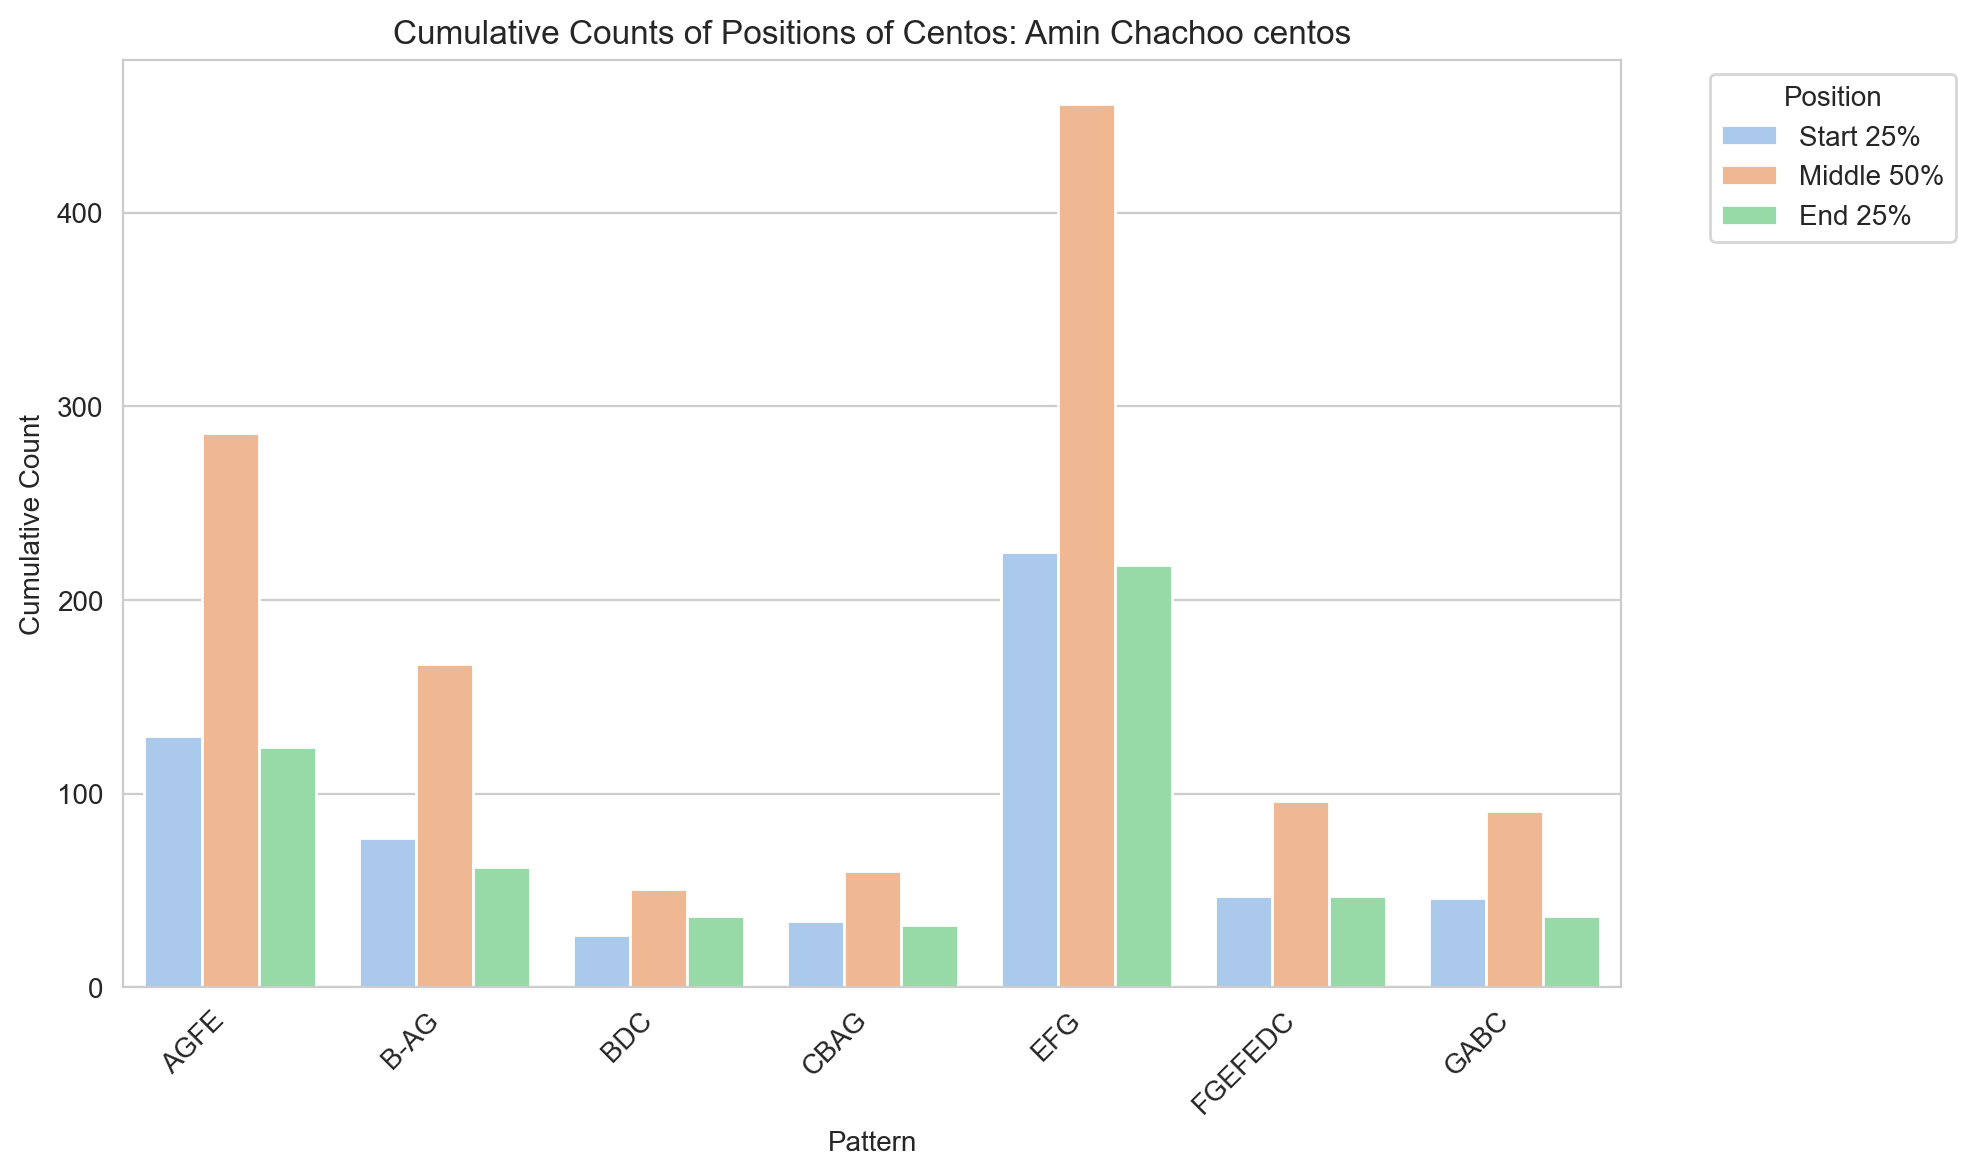

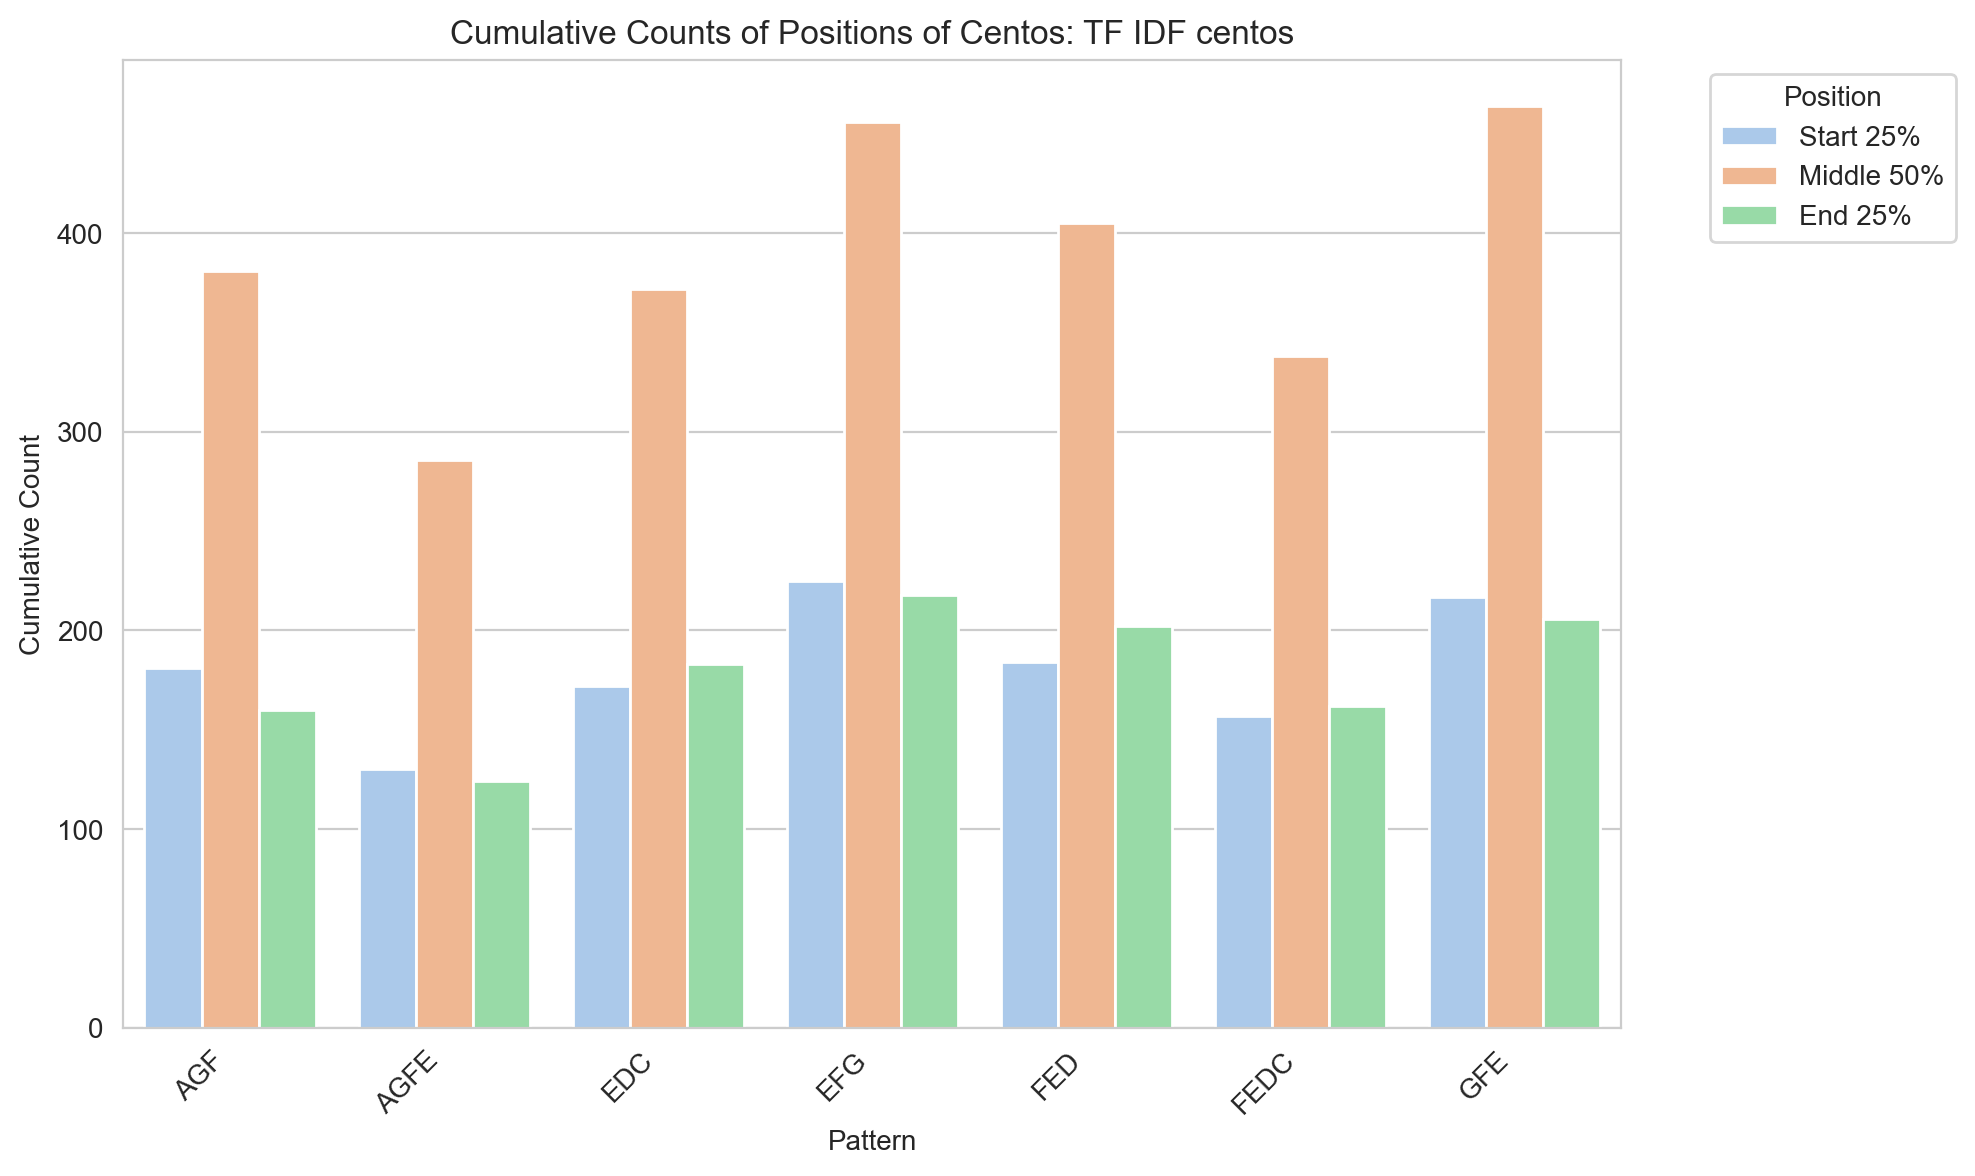

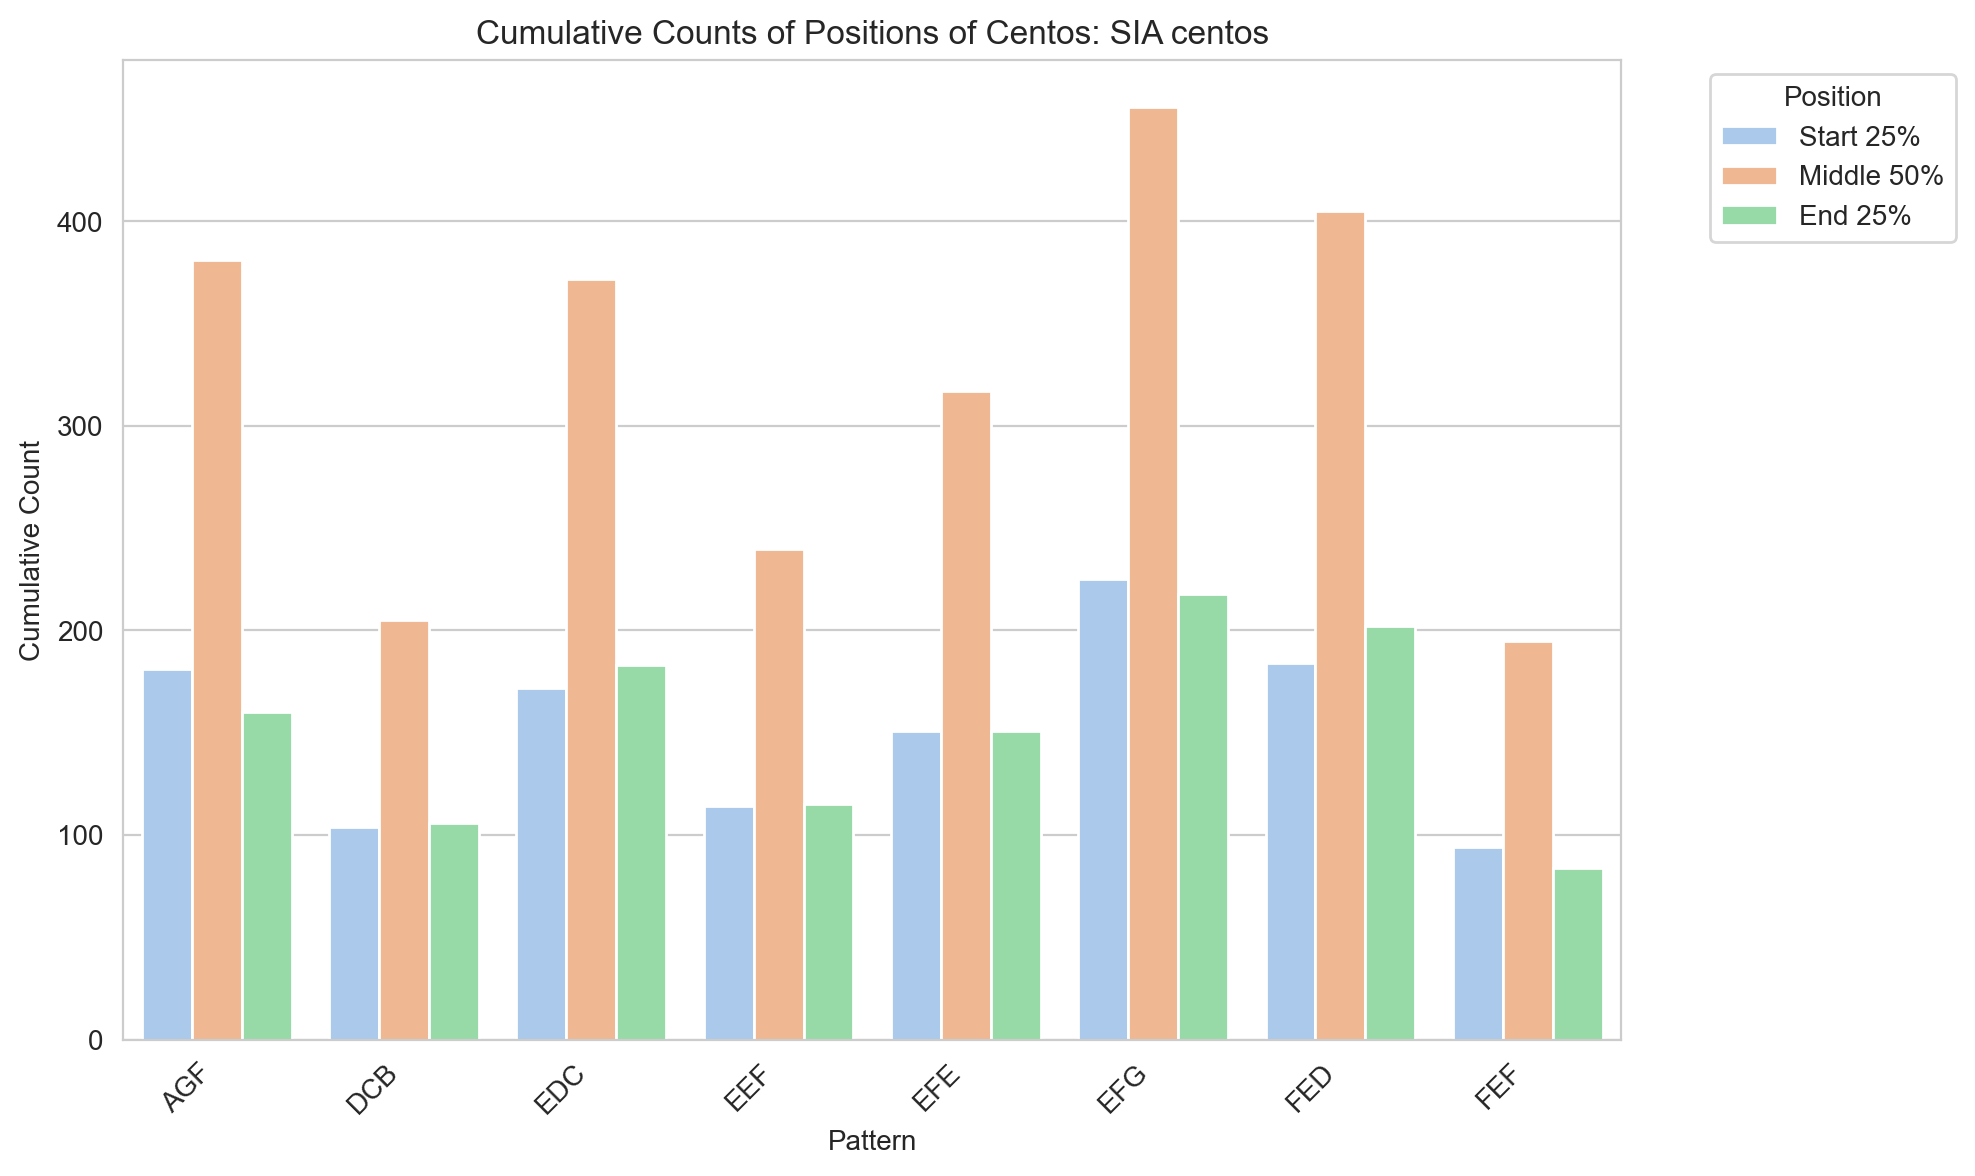

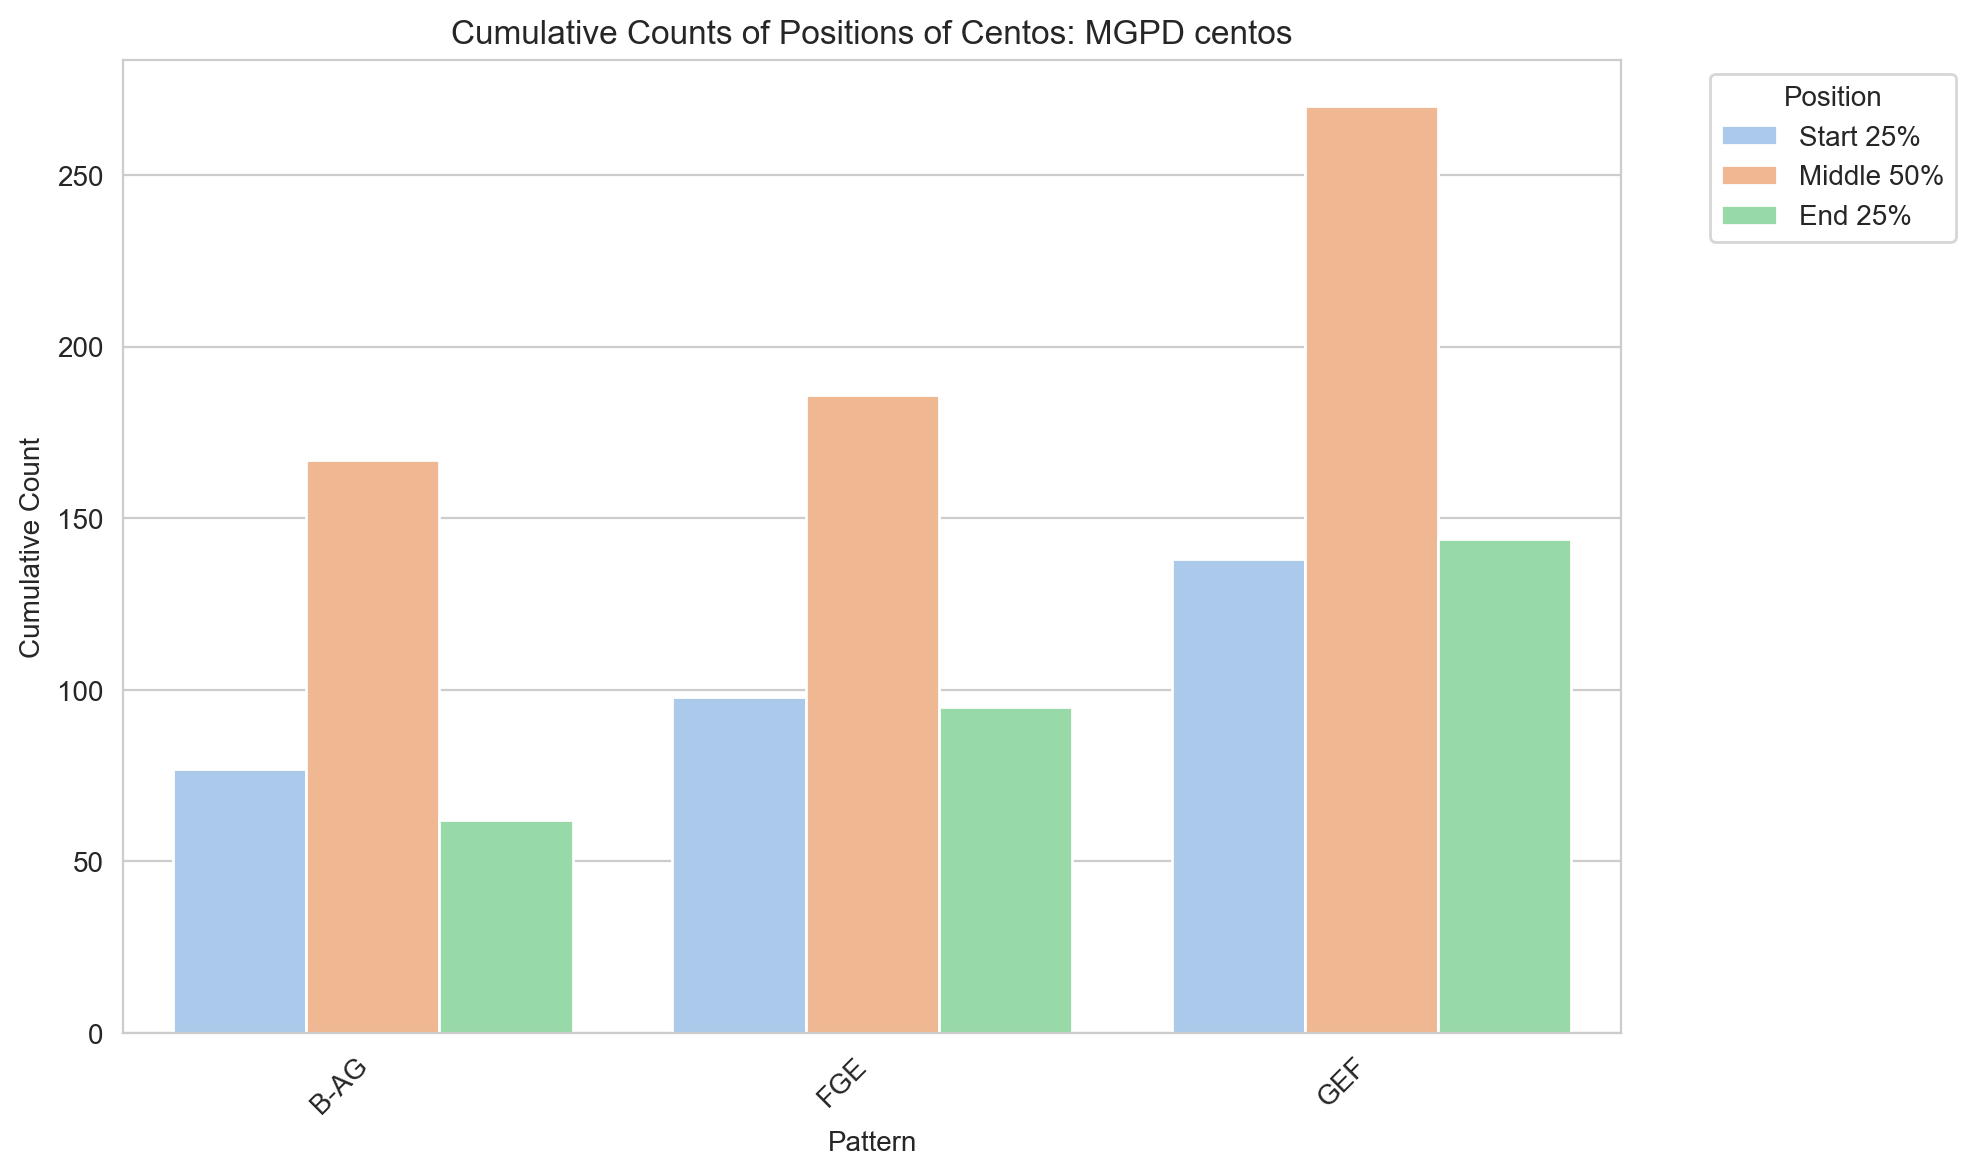

LINE LEVEL:


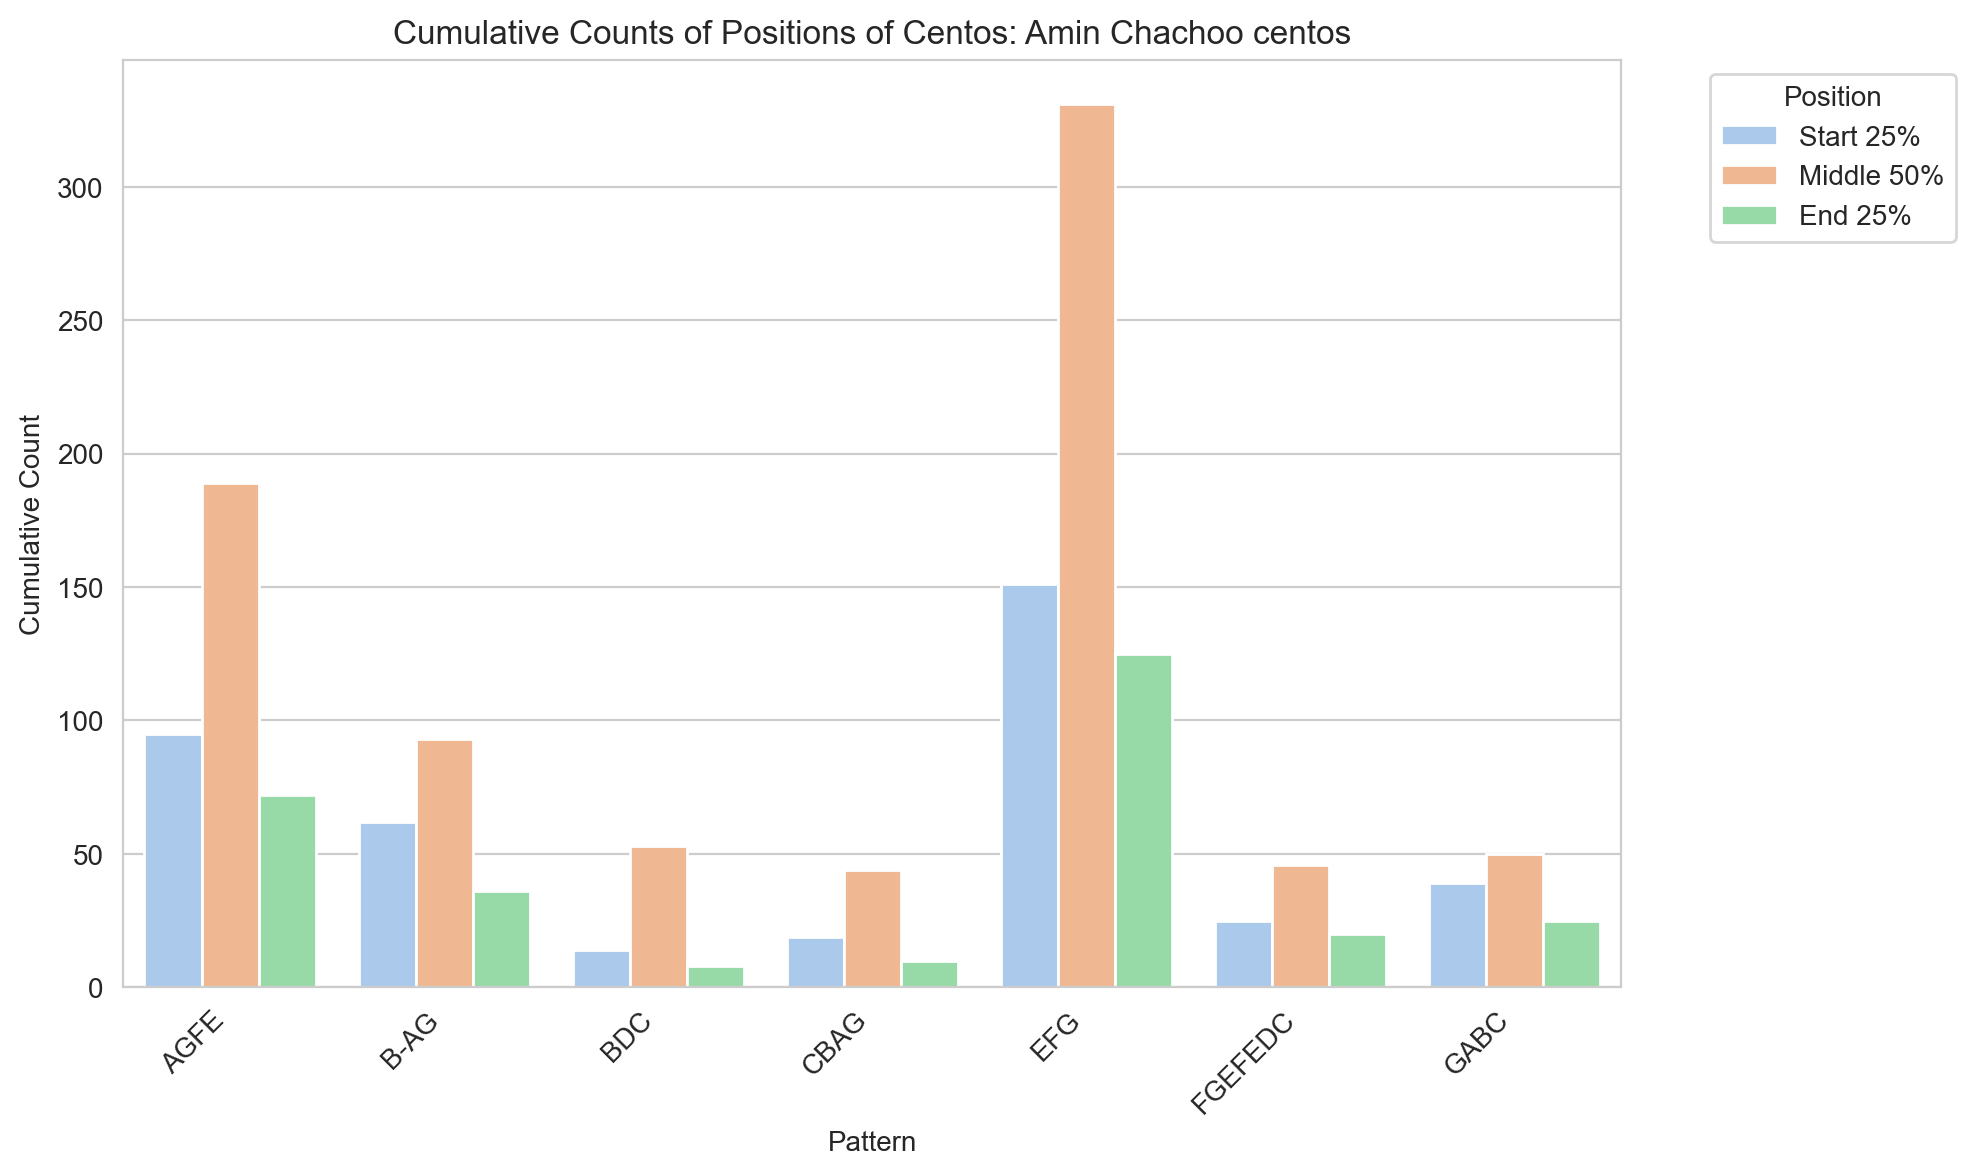

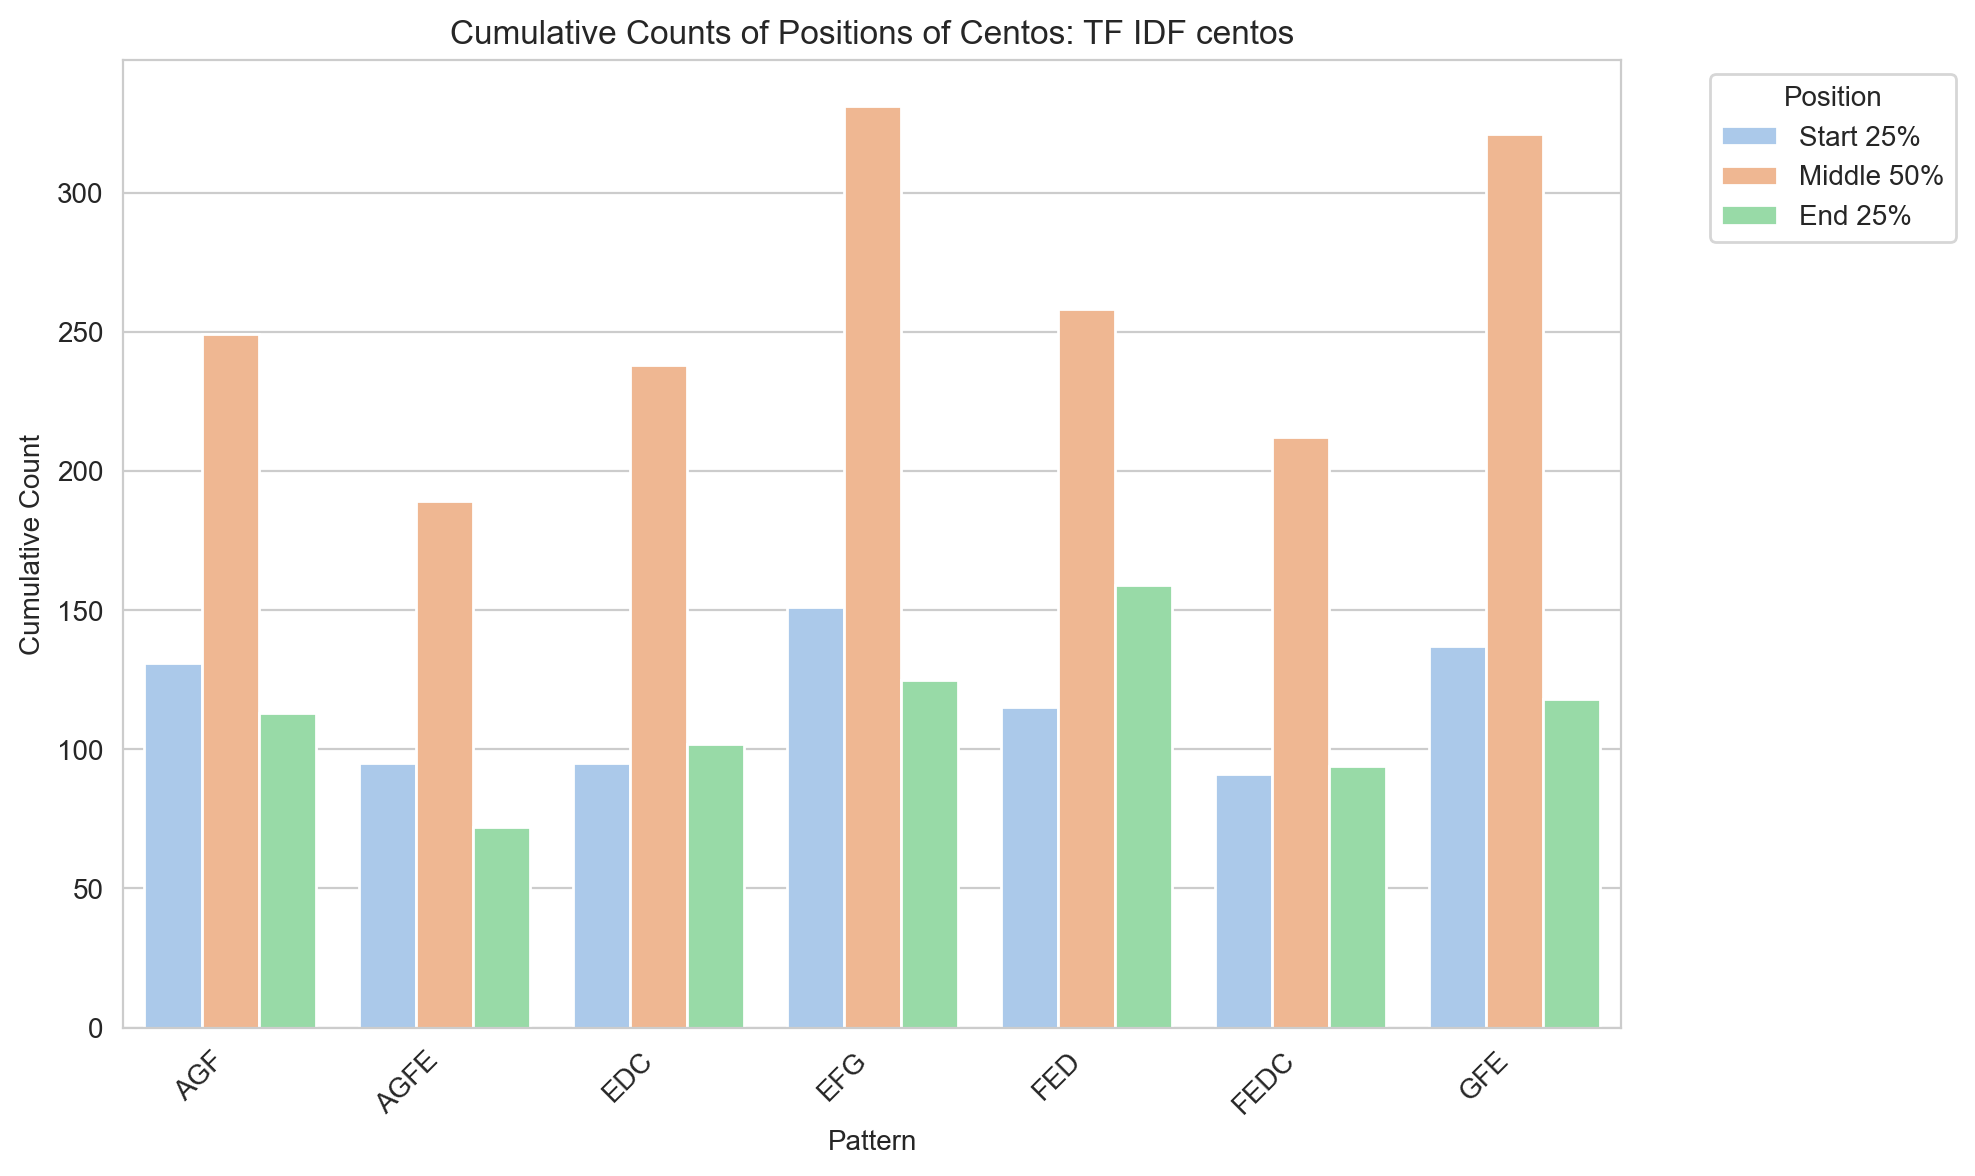

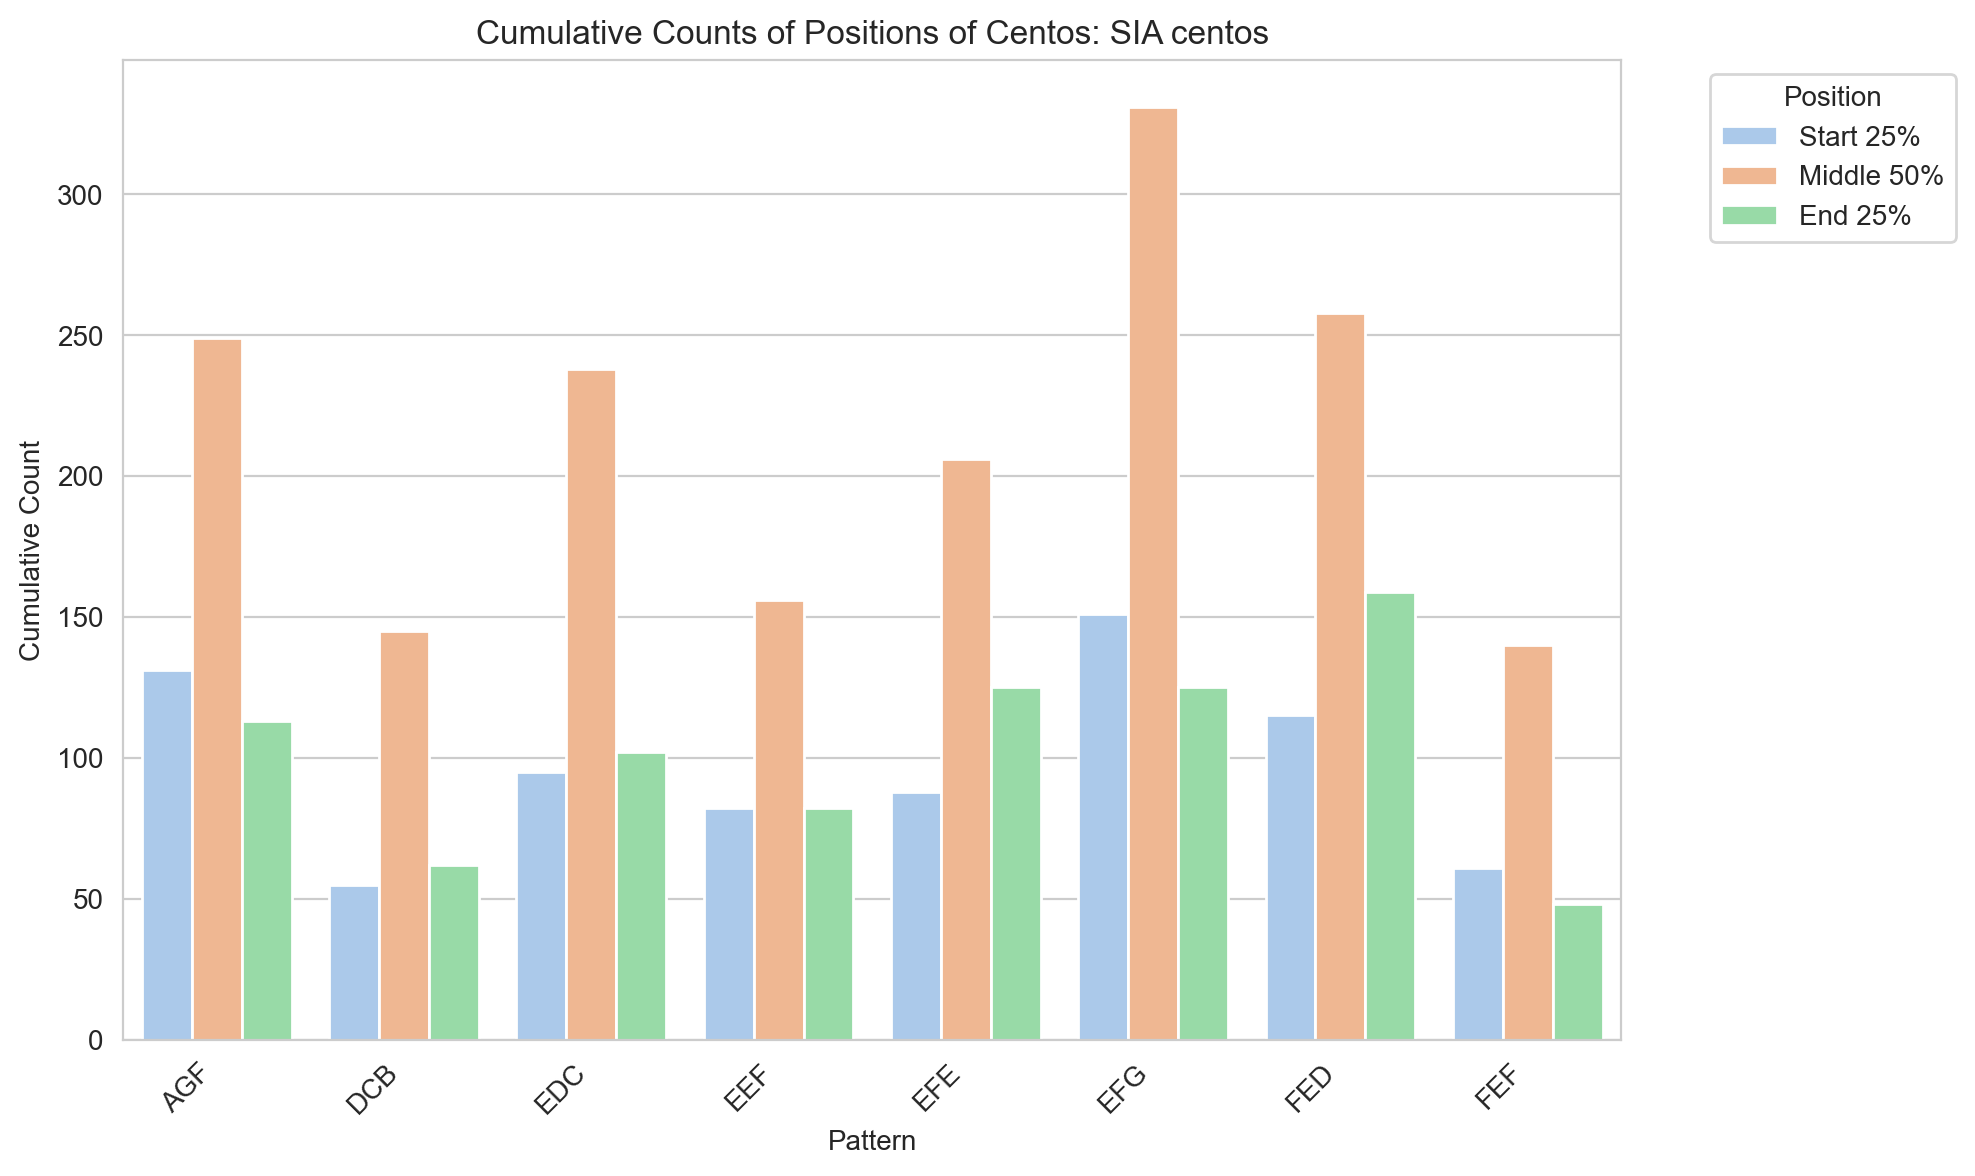

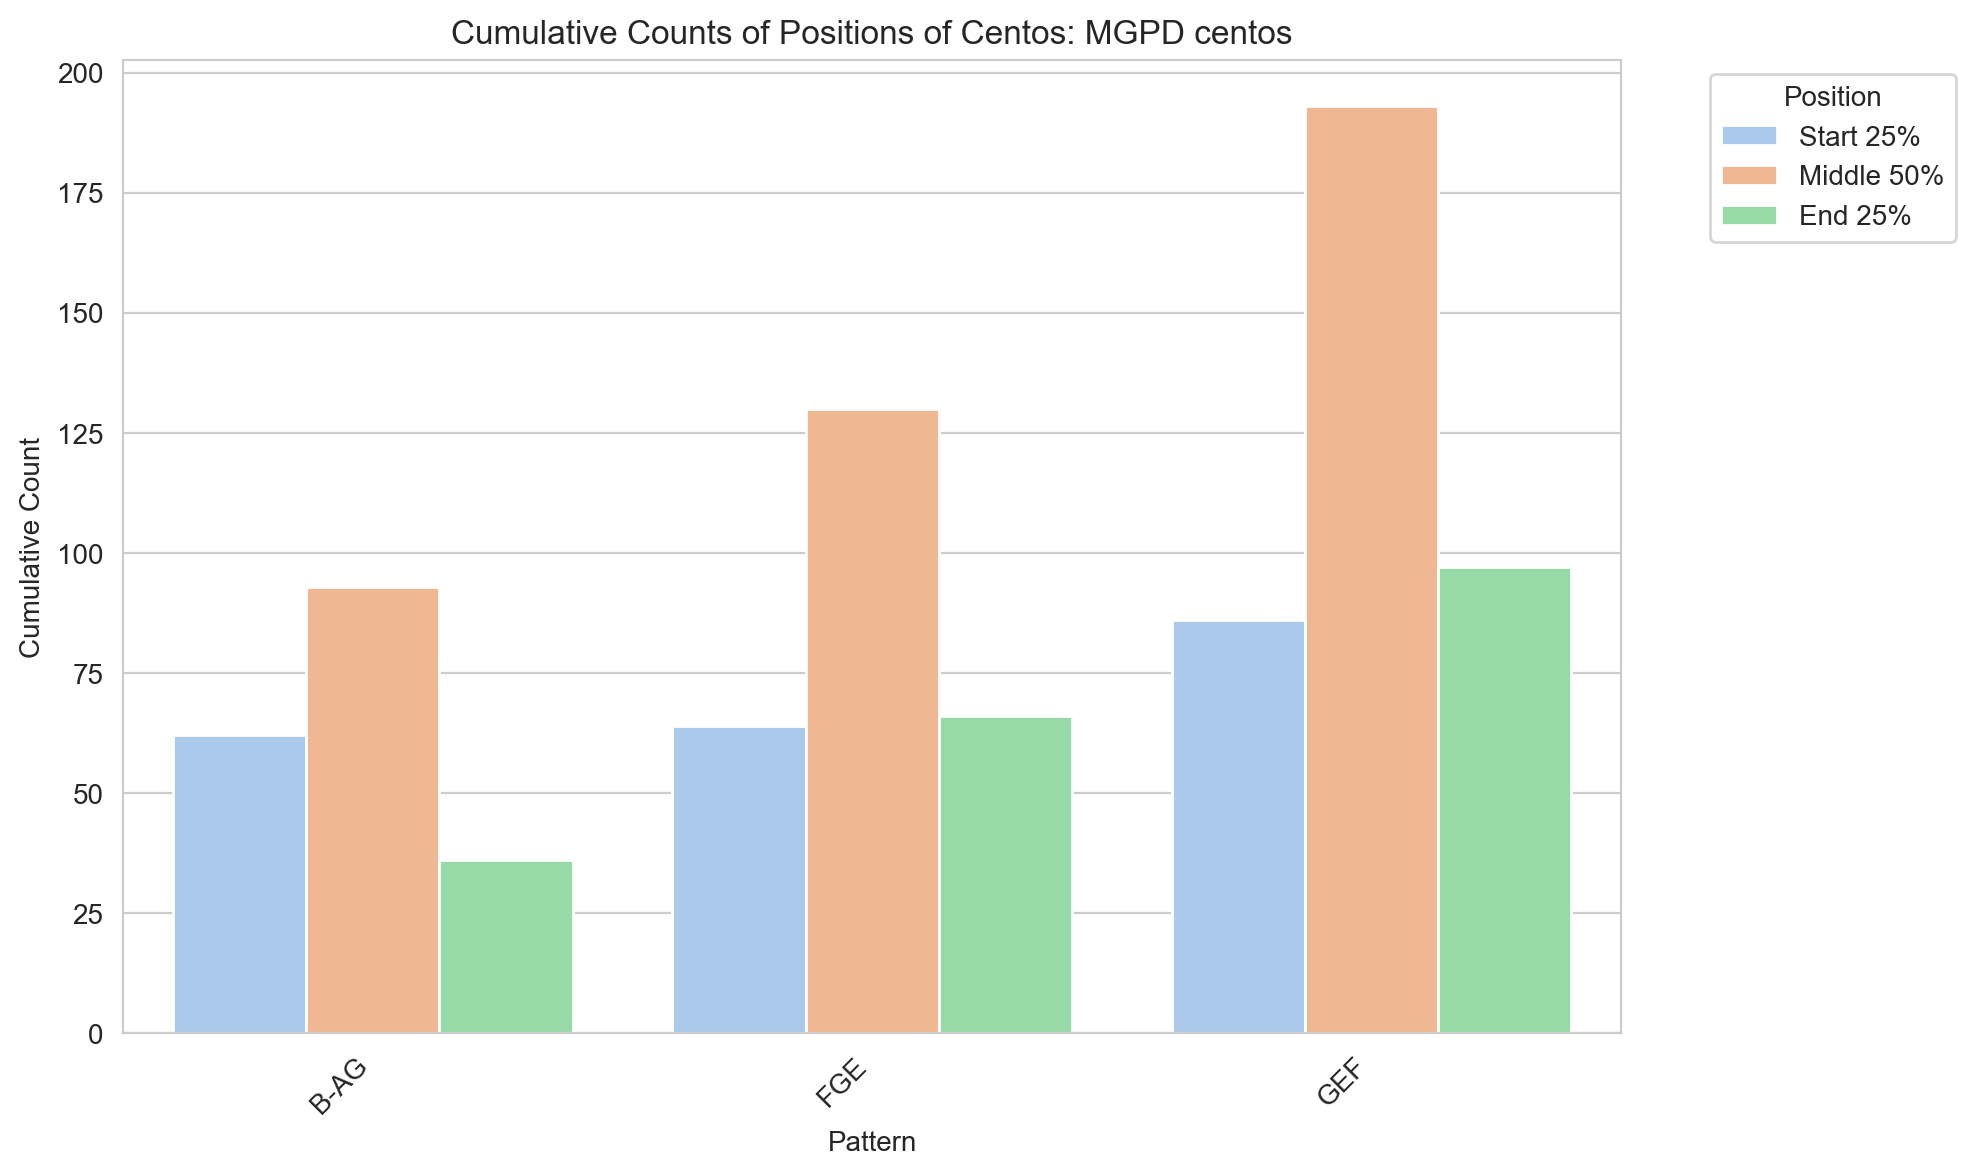

In [112]:
'''
Plot the overall distribution of the centos in each centos list.
'''

print("SANAI LEVEL:")
for centos_list in sanai_distribution:
    plot_centos_distribution(sanai_distribution[centos_list], centos_list)

print("LINE LEVEL:")
for centos_list in lines_distribution:
    plot_centos_distribution(lines_distribution[centos_list], centos_list)

In [113]:
def chi_squared_test(data):
    """
    Test the statistical significance of pattern occurrence in different positions.

    This function performs the chi-square test for each pattern to determine if there
    is a statistically significant association between the pattern and its occurrence
    in the start 25%, middle 50%, and end 25% positions.

    PARAMETERS:
        - data (dict): A dictionary containing data for different patterns and their occurrence
                   counts in start 25%, middle 50%, and end 25% positions.

    RETURNS:
        pd.DataFrame: A DataFrame containing the chi-square test results for each pattern.
                      It includes columns for Pattern, p-value, and whether the result is significant.
    """
    chi_results = []
    
    for pattern in data['Pattern']:
        pattern_data = data[data['Pattern'] == pattern][['Start 25%', 'Middle 50%', 'End 25%']].values
        chi2_stat, p_val, dof, ex = chi2_contingency(pattern_data)
        
        # Determine if the result is significant (p-value < 0.05)
        is_significant = p_val < 0.05
        
        chi_results.append({'Pattern': pattern, 'p-value': p_val, 'Significant': is_significant})
    
    return pd.DataFrame(chi_results)


def mcnemar_test(df, significance_val=0.05):
    """
    Perform McNemar's test for paired nominal data.

    This function compares the marginal frequencies of two binary variables measured on the same subjects,
    which represent the occurrences of a pattern in different positions (start 25%, middle 50%, end 25%).

    Parameters:
        - df (DataFrame): DataFrame containing pattern occurrence counts in different positions.

    Returns:
        DataFrame: DataFrame containing p-values for each pattern.
    """
    results = []
    for pattern in df['Pattern']:
        pattern_data = df[df['Pattern'] == pattern][['Start 25%', 'Middle 50%', 'End 25%']].values
        # Perform McNemar's test for adjacent positions
        p_vals = []
        for i in range(2):  # Compare start 25% vs. middle 50%, and middle 50% vs. end 25%
            contingency_table = [[pattern_data[0, i], pattern_data[0, i+1]],
                                 [pattern_data[0, i+1], pattern_data[0, i]]]
            _, p_val, _, _ = chi2_contingency(contingency_table)
            p_vals.append(p_val)
        # Take the maximum p-value among the two comparisons
        max_p_val = max(p_vals)
        # Check if the result is significant
        significant = max_p_val < significance_val
        results.append((max_p_val, significant))

    result_df = df.copy()
    result_df['p-value'] = [res[0] for res in results]
    result_df['Significant'] = [res[1] for res in results]
    return result_df



In [114]:
'''
Calculate statistical significance of results.
'''

sanai_stat_sig = {}
line_stat_sig = {}

print("Pure Chi Squared")
print("SANAI LEVEL:")
for centos_list in sanai_distribution:
    sanai_stat_sig[centos_list] = chi_squared_test(sanai_distribution[centos_list])
    display(sanai_stat_sig[centos_list].style)

print("LINE LEVEL:")
for centos_list in lines_distribution:
    line_stat_sig[centos_list] = chi_squared_test(lines_distribution[centos_list])
    display(line_stat_sig[centos_list].style)


print("\nMcNemar Test")
print("SANAI LEVEL:")
for centos_list in sanai_distribution:
    sanai_stat_sig[centos_list] = mcnemar_test(sanai_distribution[centos_list])
    display(sanai_stat_sig[centos_list].style)

print("LINE LEVEL:")
for centos_list in lines_distribution:
    line_stat_sig[centos_list] = mcnemar_test(lines_distribution[centos_list])
    display(line_stat_sig[centos_list].style)


Pure Chi Squared
SANAI LEVEL:


,Pattern,p-value,Significant
0,AGFE,1.000000,False
1,B-AG,1.000000,False
2,BDC,1.000000,False
3,CBAG,1.000000,False
4,EFG,1.000000,False
5,FGEFEDC,1.000000,False
6,GABC,1.000000,False


,Pattern,p-value,Significant
0,AGF,1.000000,False
1,AGFE,1.000000,False
2,EDC,1.000000,False
3,EFG,1.000000,False
4,FED,1.000000,False
5,FEDC,1.000000,False
6,GFE,1.000000,False


,Pattern,p-value,Significant
0,AGF,1.000000,False
1,DCB,1.000000,False
2,EDC,1.000000,False
3,EEF,1.000000,False
4,EFE,1.000000,False
5,EFG,1.000000,False
6,FED,1.000000,False
7,FEF,1.000000,False


,Pattern,p-value,Significant
0,B-AG,1.000000,False
1,FGE,1.000000,False
2,GEF,1.000000,False


LINE LEVEL:


,Pattern,p-value,Significant
0,AGFE,1.000000,False
1,B-AG,1.000000,False
2,BDC,1.000000,False
3,CBAG,1.000000,False
4,EFG,1.000000,False
5,FGEFEDC,1.000000,False
6,GABC,1.000000,False


,Pattern,p-value,Significant
0,AGF,1.000000,False
1,AGFE,1.000000,False
2,EDC,1.000000,False
3,EFG,1.000000,False
4,FED,1.000000,False
5,FEDC,1.000000,False
6,GFE,1.000000,False


,Pattern,p-value,Significant
0,AGF,1.000000,False
1,DCB,1.000000,False
2,EDC,1.000000,False
3,EEF,1.000000,False
4,EFE,1.000000,False
5,EFG,1.000000,False
6,FED,1.000000,False
7,FEF,1.000000,False


,Pattern,p-value,Significant
0,B-AG,1.000000,False
1,FGE,1.000000,False
2,GEF,1.000000,False



McNemar Test
SANAI LEVEL:


,Pattern,Start 25%,Middle 50%,End 25%,p-value,Significant
0,AGFE,130,286,124,0.000000,True
1,B-AG,77,167,62,0.000000,True
2,BDC,27,51,37,0.050016,False
3,CBAG,34,60,32,0.000266,True
4,EFG,225,456,218,0.000000,True
5,FGEFEDC,47,96,47,0.000000,True
6,GABC,46,91,37,0.000000,True


,Pattern,Start 25%,Middle 50%,End 25%,p-value,Significant
0,AGF,181,381,160,0.000000,True
1,AGFE,130,286,124,0.000000,True
2,EDC,172,372,183,0.000000,True
3,EFG,225,456,218,0.000000,True
4,FED,184,405,202,0.000000,True
5,FEDC,157,338,162,0.000000,True
6,GFE,217,464,206,0.000000,True


,Pattern,Start 25%,Middle 50%,End 25%,p-value,Significant
0,AGF,181,381,160,0.000000,True
1,DCB,104,205,106,0.000000,True
2,EDC,172,372,183,0.000000,True
3,EEF,114,240,115,0.000000,True
4,EFE,151,317,151,0.000000,True
5,EFG,225,456,218,0.000000,True
6,FED,184,405,202,0.000000,True
7,FEF,94,195,84,0.000000,True


,Pattern,Start 25%,Middle 50%,End 25%,p-value,Significant
0,B-AG,77,167,62,0.000000,True
1,FGE,98,186,95,0.000000,True
2,GEF,138,270,144,0.000000,True


LINE LEVEL:


,Pattern,Start 25%,Middle 50%,End 25%,p-value,Significant
0,AGFE,95,189,72,0.000000,True
1,B-AG,62,93,36,0.000655,True
2,BDC,14,53,8,0.000000,True
3,CBAG,19,44,10,0.000019,True
4,EFG,151,331,125,0.000000,True
5,FGEFEDC,25,46,20,0.000789,True
6,GABC,39,50,25,0.133857,False


,Pattern,Start 25%,Middle 50%,End 25%,p-value,Significant
0,AGF,131,249,113,0.000000,True
1,AGFE,95,189,72,0.000000,True
2,EDC,95,238,102,0.000000,True
3,EFG,151,331,125,0.000000,True
4,FED,115,258,159,0.000000,True
5,FEDC,91,212,94,0.000000,True
6,GFE,137,321,118,0.000000,True


,Pattern,Start 25%,Middle 50%,End 25%,p-value,Significant
0,AGF,131,249,113,0.000000,True
1,DCB,55,145,62,0.000000,True
2,EDC,95,238,102,0.000000,True
3,EEF,82,156,82,0.000000,True
4,EFE,88,206,125,0.000000,True
5,EFG,151,331,125,0.000000,True
6,FED,115,258,159,0.000000,True
7,FEF,61,140,48,0.000000,True


,Pattern,Start 25%,Middle 50%,End 25%,p-value,Significant
0,B-AG,62,93,36,0.000655,True
1,FGE,64,130,66,0.000000,True
2,GEF,86,193,97,0.000000,True


## notes on the statistical significance tests

The results of pure chi-squared test suggest no statistical significance, while McNemar's test suggests there is, which might seem contradictory. However, it's essential to understand that these tests operate under different assumptions and are sensitive to different aspects of the data.

McNemar's test is specifically designed to assess changes or differences in paired nominal data. It's commonly used when comparing observations from the same subjects (or items) across two conditions or time points. McNemar's test is sensitive to changes within pairs, which can occur even with small sample sizes.

On the other hand, the chi-squared test is a more general test of independence between categorical variables. It evaluates whether there is a significant association between two categorical variables, regardless of whether they are paired or independent. It's possible for the chi-squared test to fail to detect significance in paired data if the differences within pairs are not substantial enough to influence the overall association.

In cases where McNemar's test suggests significance while the chi-squared test does not, it's essential to consider the nature of the data and the specific research question you're investigating. If McNemar's test is theoretically more appropriate for your study design and hypothesis, and if it aligns better with your understanding of the data generation process, then its results may be more informative. However, it's always essential to interpret the results within the context of your study and consider the limitations and assumptions of the statistical tests used.

In [167]:
def combine_normalized_position_counts(data):
    '''
    Combine the normalized counts for start, middle, and end positions across all patterns and centos types.

    Parameters:
        data (dict): A dictionary containing centos types as keys and their corresponding dataframes as values.
                     Each dataframe should have columns 'Pattern', 'Start 25%', 'Middle 50%', and 'End 25%'.

    Returns:
        dict: A dictionary containing the combined normalized counts for start, middle, and end positions.
    '''
    # Initialize total normalized counts for start, middle, and end positions
    total_counts = {'Start 25%': 0, 'Middle 50%': 0, 'End 25%': 0}

    # Iterate through the data dictionary and sum normalized counts for each position
    for df in data.values():
        # Normalize counts within each row
        row_sums = df[['Start 25%', 'Middle 50%', 'End 25%']].sum(axis=1)
        normalized_counts = df[['Start 25%', 'Middle 50%', 'End 25%']].div(row_sums, axis=0)

        # Sum normalized counts for each position
        total_counts['Start 25%'] += normalized_counts['Start 25%'].sum()
        total_counts['Middle 50%'] += normalized_counts['Middle 50%'].sum()
        total_counts['End 25%'] += normalized_counts['End 25%'].sum()

    return total_counts


def plot_complete_distribution_trend(total_counts, level):
    """
    Plot the development of counts for start, middle, and end positions on a line chart.

    Parameters:
        total_counts (dict): A dictionary containing the total counts for start, middle, and end positions.
        level (str): indicate whether plot is on sanai or line level 
    """
    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(total_counts, index=[0])

    # Normalize the counts
    df_normalized = df.div(df.sum(axis=1), axis=0)

    # Melt the DataFrame to long format for easier plotting
    df_melted = df_normalized.melt(var_name='Position', value_name='Count')

    # Plot the line chart with smooth curves
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_melted, x='Position', y='Count', marker='o', sort=False, err_style=None, linewidth=3, color='lightblue')
    
    # Fill the area under the line
    x_fill = df_melted['Position'].unique()
    y_fill = df_normalized.values.flatten()
    plt.fill_between(x_fill, y_fill, color='lightblue', alpha=0.3)

    plt.title(f'Distribution of Centos at the Start, Middle, and End Positions at {level} level')
    plt.xlabel('Position')
    plt.ylabel('Normalized Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

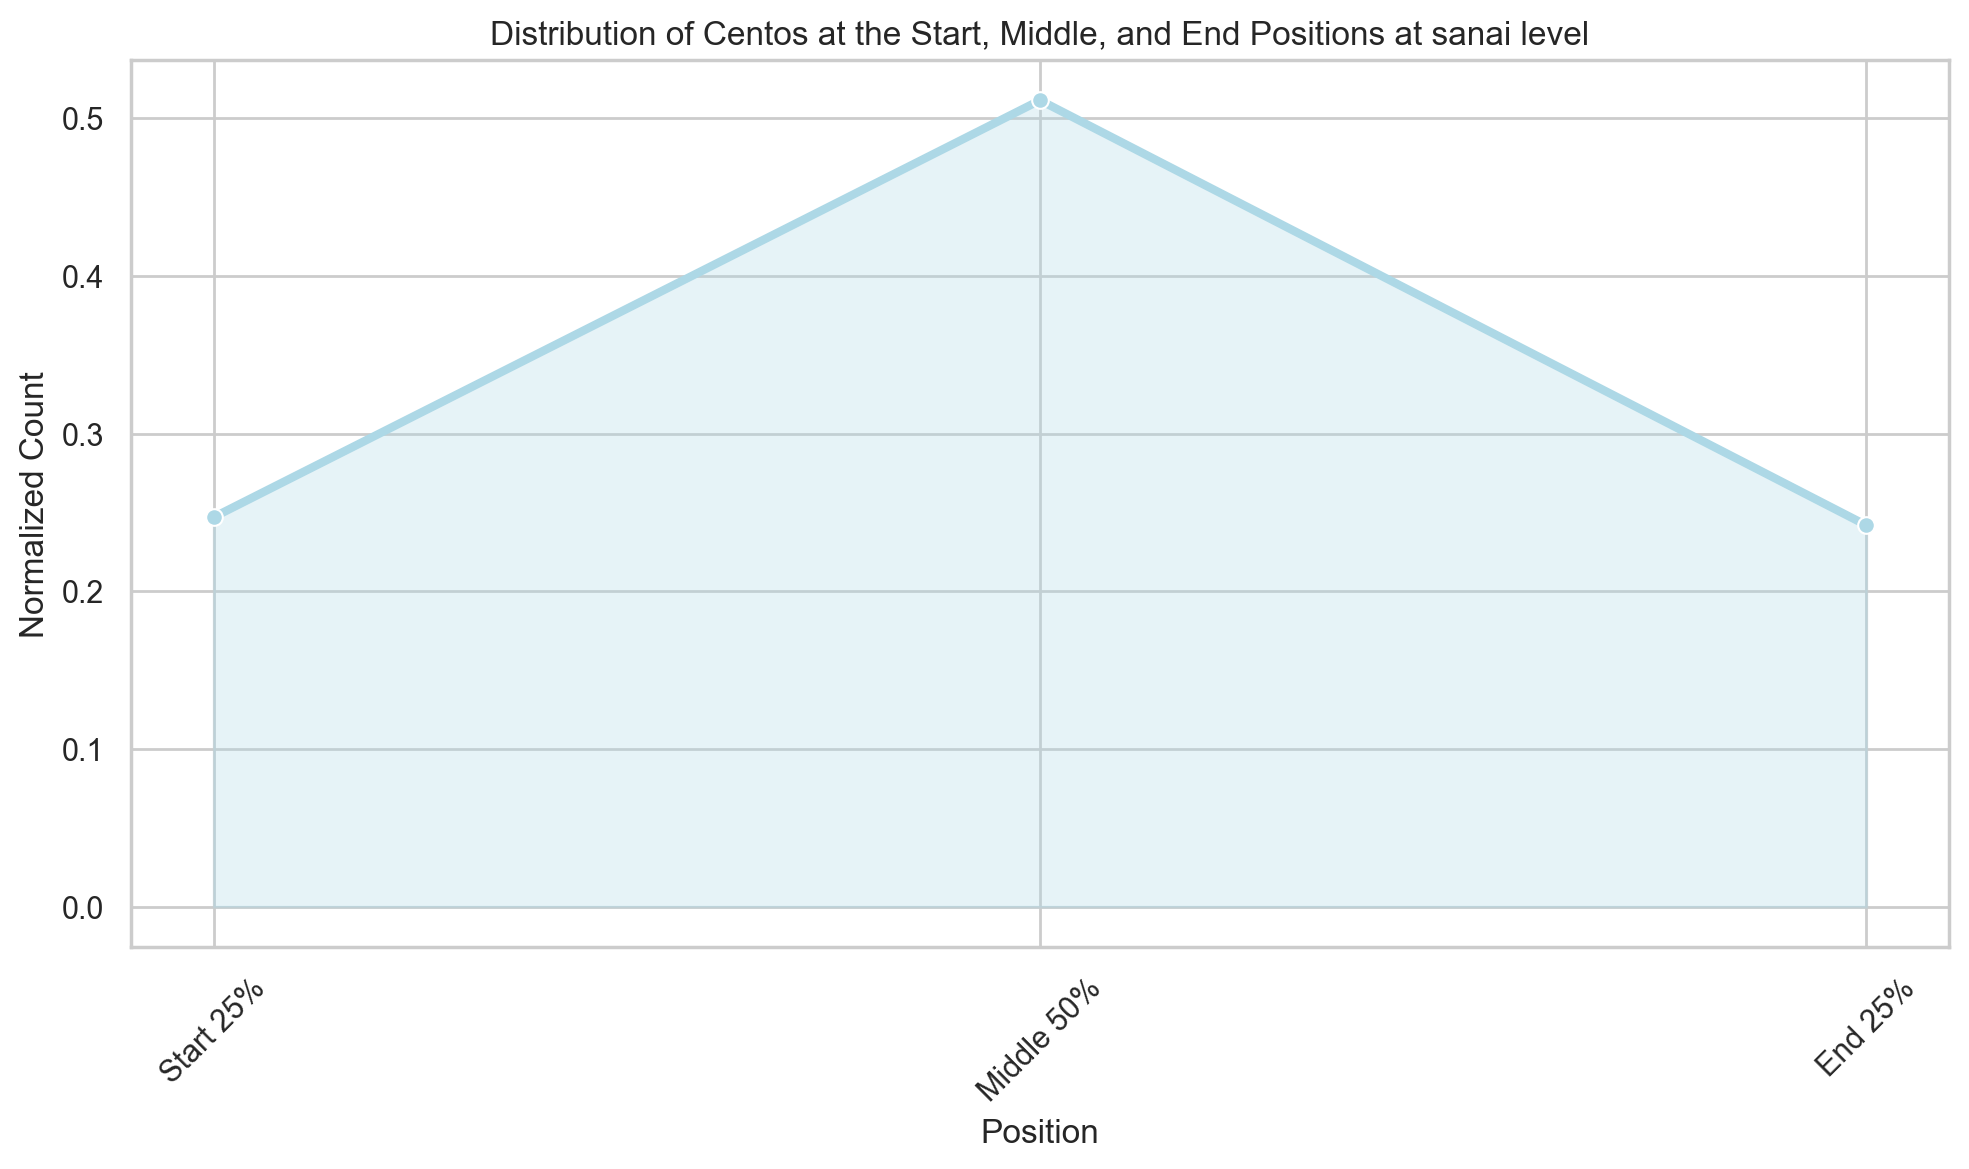

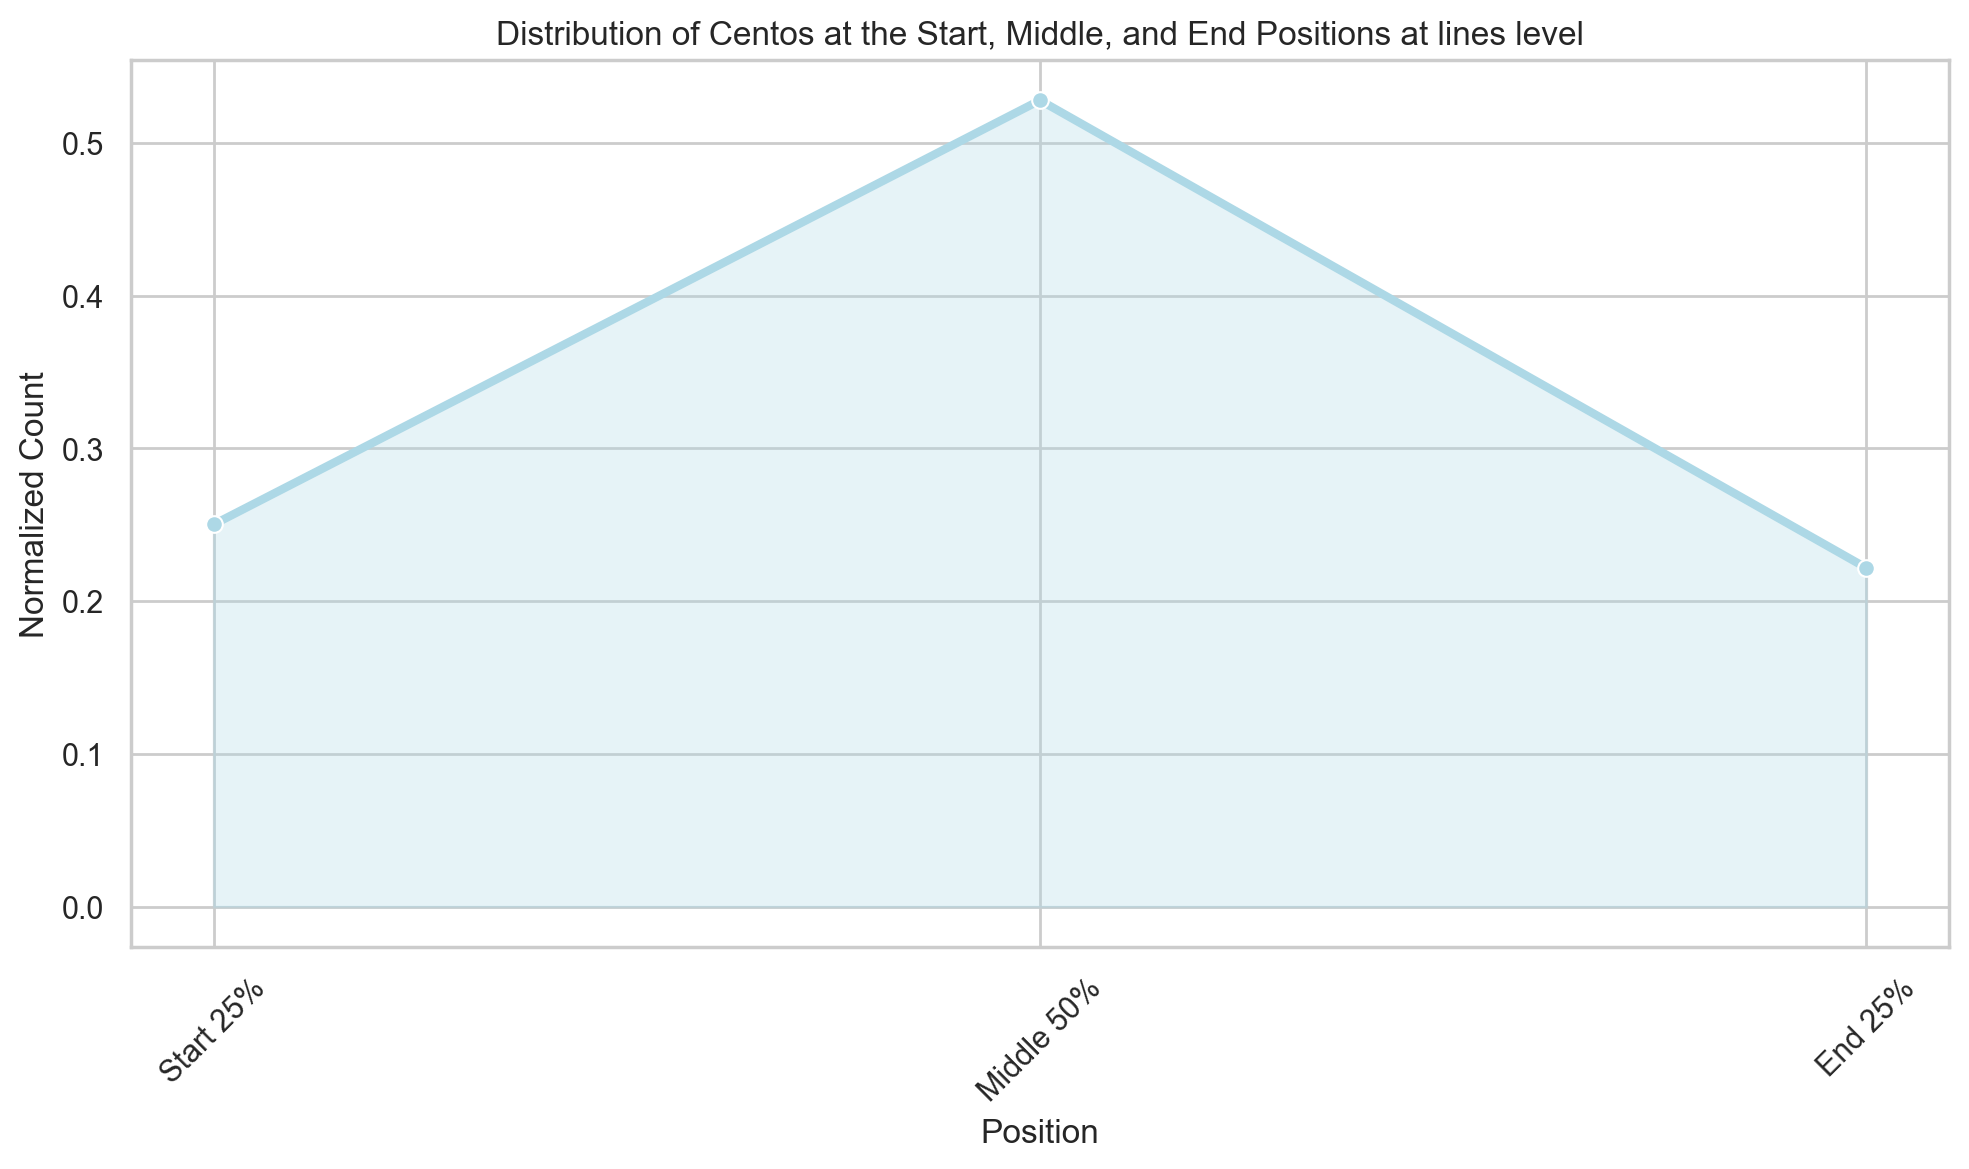

In [168]:
sanai_combined = combine_normalized_position_counts(sanai_distribution)
#print(sanai_combined)
plot_complete_distribution_trend(sanai_combined, 'sanai')

lines_combined = combine_normalized_position_counts(lines_distribution)
#print(sanai_combined)
plot_complete_distribution_trend(lines_combined, 'lines')